In [6]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2021,1,18)
df= yf.download(tickers, start=start, end=end)
print(df)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
             Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2019-01-02   64.609894  31.963160  156.195236   38.562561   77.952286   
2019-01-03   62.229683  29.581665  161.071426   34.721451   75.383873   
2019-01-04   64.383667  31.530161  157.075516   36.203678   77.812500   
2019-01-07   65.750809  32.425678  159.380096   36.123104   78.948189   
2019-01-08   66.714699  31.904110  158.272324   36.811718   79.315125   
...                ...        ...         ...         ...         ...   
2021-01-11  128.149994  15.000000  171.020004  128.979996  107.759651   
2021-01-12  126.970001  15.380000  176.669998  128.800003  108.

In [5]:
import numpy as np
import pandas as pd

In [7]:
df = df['Adj Close']

In [10]:
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,64.609894,31.963160,156.195236,38.562561,77.952286,71.761269,309.959991,67.034943,136.179626,224.570007,...,84.360565,61.586319,37.272896,18.507345,64.819427,88.240112,100.729301,156.240005,38.978245,83.466866
2019-01-03,62.229683,29.581665,161.071426,34.721451,75.383873,70.720268,302.290009,63.871284,131.530212,215.699997,...,81.184296,60.640751,37.292564,18.102819,62.597370,86.020599,98.907349,146.880005,38.762630,80.581871
2019-01-04,64.383667,31.530161,157.075516,36.203678,77.812500,71.539574,313.440002,65.694260,136.644577,226.190002,...,84.943359,62.876545,38.374649,18.801558,65.238464,88.259399,102.285339,152.970001,39.953167,83.743507
2019-01-07,65.750809,32.425678,159.380096,36.123104,78.948189,72.050430,314.799988,66.678070,137.119217,229.259995,...,87.187141,63.203518,39.063255,19.206085,64.273651,88.162910,102.324730,155.289993,40.112530,84.247383
2019-01-08,66.714699,31.904110,158.272324,36.811718,79.315125,72.821541,318.420013,65.877518,140.586914,232.679993,...,85.526176,63.663055,38.797646,19.840467,64.877892,87.989220,100.030052,156.330002,40.478130,85.502151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,128.149994,15.000000,171.020004,128.979996,107.759651,107.349998,324.589996,110.395256,259.463379,474.239990,...,151.080002,46.840000,58.500000,23.440001,106.019997,107.669998,159.000000,413.790009,49.869999,169.389999
2021-01-12,126.970001,15.380000,176.669998,128.800003,108.510864,106.519997,324.670013,108.403282,257.519989,471.649994,...,146.669998,47.880001,59.950001,23.219999,105.830002,107.669998,159.830002,407.950012,50.360001,166.119995
2021-01-13,126.980003,15.530000,171.759995,130.889999,111.150002,105.620003,323.709991,111.700005,257.079987,472.049988,...,141.169998,48.419998,59.509998,22.940001,105.209999,107.150002,162.949997,412.450012,49.790001,161.949997


In [11]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0.000382,0.000311,0.000204,0.000281,0.000196,0.000222,0.000202,0.000253,0.000257,0.000275,...,0.000289,0.000250,0.000221,0.000301,0.000270,0.000177,0.000228,0.000331,0.000254,0.000246
AAL,0.000311,0.002253,0.000411,0.000319,0.000195,0.000280,0.000286,0.000184,0.000347,0.000205,...,0.000336,0.000639,0.000460,0.000815,0.000528,0.000420,0.000548,0.000437,0.000734,0.000237
AAP,0.000204,0.000411,0.000584,0.000249,0.000183,0.000243,0.000180,0.000187,0.000238,0.000243,...,0.000229,0.000275,0.000265,0.000405,0.000300,0.000247,0.000238,0.000289,0.000300,0.000229
AAPL,0.000281,0.000319,0.000249,0.000568,0.000219,0.000228,0.000244,0.000275,0.000305,0.000407,...,0.000352,0.000262,0.000196,0.000357,0.000289,0.000224,0.000236,0.000382,0.000219,0.000288
ABBV,0.000196,0.000195,0.000183,0.000219,0.000395,0.000207,0.000133,0.000205,0.000203,0.000225,...,0.000173,0.000209,0.000209,0.000237,0.000192,0.000155,0.000196,0.000234,0.000186,0.000195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.000177,0.000420,0.000247,0.000224,0.000155,0.000205,0.000127,0.000184,0.000249,0.000184,...,0.000187,0.000267,0.000254,0.000372,0.000255,0.000413,0.000297,0.000219,0.000246,0.000241
ZBH,0.000228,0.000548,0.000238,0.000236,0.000196,0.000234,0.000217,0.000209,0.000291,0.000206,...,0.000208,0.000365,0.000357,0.000503,0.000291,0.000297,0.000577,0.000296,0.000374,0.000244
ZBRA,0.000331,0.000437,0.000289,0.000382,0.000234,0.000274,0.000272,0.000274,0.000331,0.000369,...,0.000402,0.000329,0.000289,0.000443,0.000364,0.000219,0.000296,0.000767,0.000369,0.000287
ZION,0.000254,0.000734,0.000300,0.000219,0.000186,0.000279,0.000188,0.000171,0.000282,0.000147,...,0.000256,0.000499,0.000406,0.000581,0.000410,0.000246,0.000374,0.000369,0.000833,0.000172


In [12]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.335587,0.432461,0.602220,0.504649,0.510434,0.331768,0.667340,0.663042,0.591326,...,0.521628,0.510258,0.467587,0.472860,0.602237,0.445341,0.485903,0.611878,0.449972,0.640710
AAL,0.335587,1.000000,0.358624,0.282117,0.206392,0.264648,0.193928,0.199612,0.368893,0.181903,...,0.249264,0.537434,0.399592,0.527514,0.485609,0.435142,0.480133,0.332436,0.535882,0.254315
AAP,0.432461,0.358624,1.000000,0.433132,0.380970,0.451521,0.239626,0.399007,0.496555,0.423687,...,0.334360,0.455059,0.452330,0.515781,0.542319,0.502153,0.410691,0.431294,0.430691,0.482322
AAPL,0.602220,0.282117,0.433132,1.000000,0.462693,0.428439,0.328405,0.594740,0.646495,0.718671,...,0.521049,0.439194,0.338920,0.459962,0.528801,0.463004,0.412708,0.578672,0.318136,0.615524
ABBV,0.504649,0.206392,0.380970,0.462693,1.000000,0.467204,0.215038,0.531084,0.516013,0.475536,...,0.307277,0.419991,0.434264,0.366607,0.421738,0.383257,0.411138,0.425717,0.324953,0.499511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.445341,0.435142,0.502153,0.463004,0.383257,0.453008,0.200182,0.466136,0.618112,0.381712,...,0.324391,0.525487,0.516335,0.562912,0.548480,1.000000,0.609031,0.388597,0.419265,0.602753
ZBH,0.485903,0.480133,0.410691,0.412708,0.411138,0.437251,0.290894,0.448142,0.610434,0.360068,...,0.305041,0.606755,0.613887,0.643818,0.528656,0.609031,1.000000,0.445202,0.539805,0.517205
ZBRA,0.611878,0.332436,0.431294,0.578672,0.425717,0.444044,0.316165,0.510116,0.603571,0.559949,...,0.511288,0.474636,0.431340,0.491431,0.573288,0.388597,0.445202,1.000000,0.462119,0.527681
ZION,0.449972,0.535882,0.430691,0.318136,0.324953,0.432847,0.209387,0.306546,0.493581,0.214199,...,0.313159,0.691353,0.580580,0.619382,0.620832,0.419265,0.539805,0.462119,1.000000,0.304064


In [16]:
# initialize weights
w = {}
for ticker in df.columns:
    w[ticker] = 1/len(df)

In [18]:
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.000316900461640647

In [32]:
quarter_returns = df.resample('Q').ffill().pct_change().mean()

In [33]:
half_year_returns = df.resample('6M').ffill().pct_change().mean()

In [34]:
year_returns = df.resample('Y').last().pct_change().mean()

In [35]:
returns = pd.concat([quarter_returns, half_year_returns,year_returns], axis=1) # Creating a table for visualising returns and volatility of assets
returns.columns = ['quarter_returns', 'half_year_returns', 'year_returns']

In [45]:
returns = returns.sort_values(by=['year_returns','half_year_returns','quarter_returns'],ascending=False)
print(returns.to_string())

       quarter_returns  half_year_returns  year_returns
TSLA          0.466071           1.141494      3.802558
ENPH          0.503229           1.521436      2.900719
ETSY          0.250703           0.526694      1.582518
LB            0.139235           0.199256      0.646574
ALB           0.137915           0.315360      0.637487
NVDA          0.158427           0.397480      0.603991
PYPL          0.137477           0.304993      0.594489
FCX           0.190383           0.371018      0.578499
ALGN          0.156718           0.285720      0.488269
AMD           0.189232           0.394406      0.480809
CTLT          0.152886           0.340784      0.479160
CDNS          0.110065           0.315481      0.476932
WST           0.142382           0.312631      0.473661
ABMD          0.050380           0.042869      0.458699
TER           0.193754           0.410465      0.456247
IDXX          0.113914           0.246159      0.446716
NOW           0.105596           0.237092      0

In [53]:
returns.loc['WMT',:]

quarter_returns      0.056705
half_year_returns    0.119473
year_returns         0.118312
Name: WMT, dtype: float64

In [55]:
returns.loc['GOOG',:]

quarter_returns      0.056742
half_year_returns    0.118349
year_returns         0.150665
Name: GOOG, dtype: float64

In [56]:
returns.loc['JNJ',:]

quarter_returns      0.025948
half_year_returns    0.064613
year_returns         0.063395
Name: JNJ, dtype: float64

In [65]:
# calculate (max-min)/mean as a way to measure volatility
(df.resample('Y').max()-df.resample('Y').min())/df.resample('Y').mean()


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.301734,0.397755,0.293143,0.741800,0.386053,0.253651,0.815794,0.290398,0.432495,0.413500,...,0.520597,0.207817,0.405364,0.633507,0.274666,0.300049,0.401248,0.538923,0.283624,0.474025
2020-12-31,0.610591,1.403260,0.627741,0.851668,0.524616,0.389245,0.829413,0.547264,0.587252,0.598118,...,0.824810,0.847219,0.615328,1.037950,0.580684,0.585335,0.595497,0.835651,0.779461,0.568136
2021-12-31,0.076159,0.093083,0.116625,0.042094,0.069203,0.129499,0.040130,0.029907,0.037239,0.058255,...,0.100479,0.190953,0.107170,0.048533,0.085265,0.020418,0.061495,0.088630,0.165137,0.051074


In [66]:
# picking my stocks
df =df[['ETSY','WMT','AAPL','NKE']]

In [101]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

ETSY    1.582518
WMT     0.118312
AAPL    0.390620
NKE     0.202207
dtype: float64

In [68]:
# Portfolio returns
w = [0.2, 0.2, 0.2, 0.2]
port_er = (w*ind_er).sum()
port_er

0.4587312112954377

In [69]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

ETSY    0.613989
WMT     0.240145
AAPL    0.376837
NKE     0.324427
dtype: float64

In [70]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['One_Year_Returns', 'Volatility']
assets

,One_Year_Returns,Volatility
ETSY,1.582518,0.613989
WMT,0.118312,0.240145
AAPL,0.390620,0.376837
NKE,0.202207,0.324427


In [102]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [103]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,ETSY,WMT,AAPL,NKE
ETSY,0.001508,0.000172,0.000413,0.000287
WMT,0.000172,0.000231,0.000165,0.000106
AAPL,0.000413,0.000165,0.000568,0.000286
NKE,0.000287,0.000106,0.000286,0.000421


In [104]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [105]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol +' weight'] = [w[counter] for w in p_weights]

In [107]:
p_ret

[0.7902633758547528,
 0.7296051362612361,
 0.37524341579742415,
 0.7889034243446844,
 0.39867462832031486,
 0.2963696098568304,
 1.0065113943546515,
 0.8111855248856366,
 0.4674777523924665,
 0.6591878254268635,
 0.6989903921916166,
 0.45468087162922854,
 0.633818792564762,
 0.43874487621196306,
 0.6599522055670914,
 0.7173229049121115,
 0.7834277711809559,
 0.5379481659208529,
 0.7553460221054609,
 0.5446560629495136,
 0.41518610558775315,
 0.426989161850351,
 0.8127678216679536,
 0.45124254993089463,
 1.0880113827161029,
 0.2229888855254497,
 0.33308134273505885,
 0.29523096240145874,
 0.5633860793029148,
 0.7074294425579674,
 0.41573045450575474,
 0.5430440676068317,
 0.8142254751801619,
 0.6545837738049285,
 1.2423929866558943,
 0.22625330322876713,
 0.5284753916420118,
 0.7864209395342965,
 0.7143076169278253,
 0.6657253844504384,
 0.28647904363858434,
 0.46814122008700254,
 0.9442854885737892,
 0.27871725690242327,
 0.4938584677965124,
 0.7557151492856566,
 0.47497659783113083,
 

In [108]:
len(data['Returns'])

10000

In [109]:
len(data['Volatility'])

10000

In [110]:
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,ETSY weight,WMT weight,AAPL weight,NKE weight
0,0.790263,0.359093,0.389594,0.073498,0.299674,0.237235
1,0.729605,0.328653,0.383017,0.253841,0.106212,0.256930
2,0.375243,0.257111,0.121605,0.324634,0.172063,0.381697
3,0.788903,0.340806,0.436114,0.376146,0.086412,0.101329
4,0.398675,0.302760,0.094899,0.037035,0.364016,0.504050


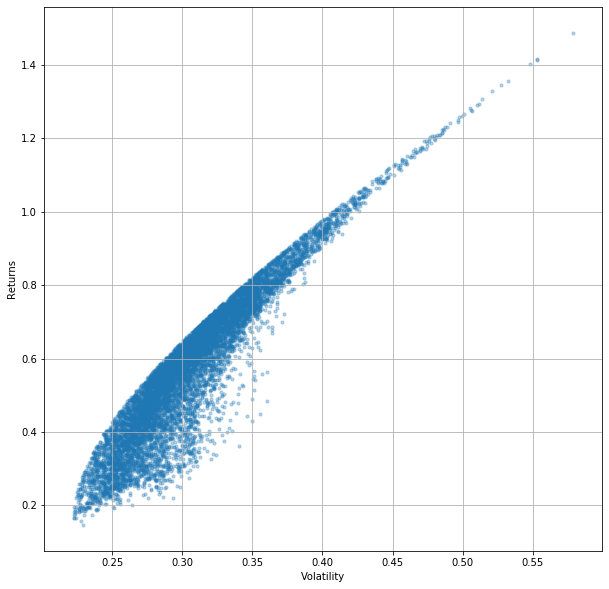

In [111]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [112]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.173847
Volatility     0.222427
ETSY weight    0.014575
WMT weight     0.637599
AAPL weight    0.026613
NKE weight     0.321213
Name: 8118, dtype: float64

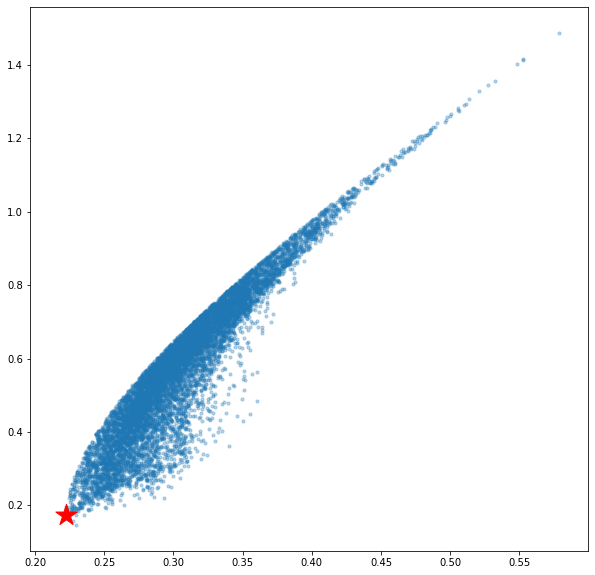

In [114]:
# plotting the minimum volatility portfolio
import matplotlib.pyplot as plt
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [124]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        1.486880
Volatility     0.578625
ETSY weight    0.933398
WMT weight     0.059296
AAPL weight    0.006733
NKE weight     0.000573
Name: 1340, dtype: float64

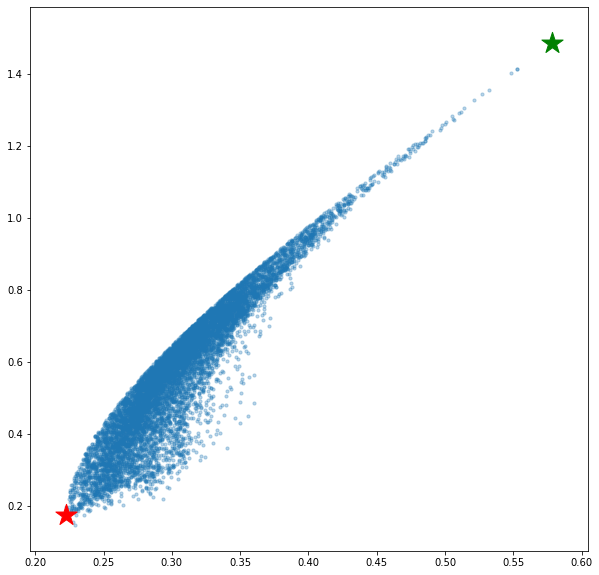

In [125]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [126]:
portfolios=portfolios.sort_values(by=['Returns','Volatility'],ascending=[False, True])

In [127]:
portfolios.loc[portfolios['Volatility']<0.3]

,Returns,Volatility,ETSY weight,WMT weight,AAPL weight,NKE weight
4175,0.639235,0.298556,0.333030,0.435222,0.073537,0.158211
9037,0.638163,0.298288,0.339865,0.436830,0.018495,0.204810
5341,0.637389,0.297674,0.340303,0.459791,0.021401,0.178505
3017,0.636951,0.298957,0.323722,0.410616,0.118652,0.147010
1301,0.636623,0.298354,0.339920,0.425337,0.004801,0.229942
...,...,...,...,...,...,...
6560,0.166578,0.222906,0.004825,0.623231,0.053063,0.318881
7338,0.165799,0.223036,0.009108,0.618859,0.015599,0.356433
979,0.164998,0.224128,0.003274,0.592710,0.042449,0.361567
2062,0.156137,0.227680,0.013552,0.851159,0.035203,0.100087


In [2]:
import datetime as dt 
start, end  = dt.datetime(2018,1,1), dt.datetime(2021,1,15)
df = web.DataReader("AAPL","yahoo",start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.442081
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.434864
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.627323
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,42.101261
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.944889
...,...,...,...,...,...,...
2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996
2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,128.800003
2021-01-13,131.449997,128.490005,128.759995,130.889999,88636800.0,130.889999


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label = 'Adj Close')

C:\Users\suc002t\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [4]:
df= df["Adj Close"]
df

Date
2018-01-02     41.442081
2018-01-03     41.434864
2018-01-04     41.627323
2018-01-05     42.101261
2018-01-08     41.944889
                 ...    
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
Name: Adj Close, Length: 766, dtype: float64

In [5]:
train_size = int(len(df) * 0.6)
validation_size = int(len(df)*0.2)
train, validation, test = df[0:train_size],df[train_size:(train_size+validation_size)], df[(train_size+validation_size):len(df)]

In [6]:
train

Date
2018-01-02    41.442081
2018-01-03    41.434864
2018-01-04    41.627323
2018-01-05    42.101261
2018-01-08    41.944889
                ...    
2019-10-22    59.298336
2019-10-23    60.094048
2019-10-24    60.192894
2019-10-25    60.934254
2019-10-28    61.544628
Name: Adj Close, Length: 459, dtype: float64

In [7]:
validation

Date
2019-10-29    60.121231
2019-10-30    60.113815
2019-10-31    61.472961
2019-11-01    63.217617
2019-11-04    63.632767
                ...    
2020-06-02    80.550545
2020-06-03    80.993980
2020-06-04    80.296448
2020-06-05    82.583374
2020-06-08    83.071640
Name: Adj Close, Length: 153, dtype: float64

In [8]:
test

Date
2020-06-09     85.694878
2020-06-10     87.899590
2020-06-11     83.679497
2020-06-12     84.401947
2020-06-15     85.445755
                 ...    
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
Name: Adj Close, Length: 154, dtype: float64

In [9]:
print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Validation Observations: %d' % (len(validation)))
print('Testing Observations: %d' % (len(test)))

Observations: 766
Training Observations: 459
Validation Observations: 153
Testing Observations: 154


# Moving Average

In [10]:
type(train)

pandas.core.series.Series